In [129]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # charts/plots
%matplotlib inline


filename = '../input/goodreads-data-778-books/goodreads_library_export.csv'
books = pd.read_csv(filename)
pd.set_option('display.max_columns', None)
books.head()

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,Binding,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Bookshelves,Bookshelves with positions,Exclusive Shelf,My Review,Spoiler,Private Notes,Read Count,Recommended For,Recommended By,Owned Copies,Original Purchase Date,Original Purchase Location,Condition,Condition Description,BCID
0,16793,Stardust,Neil Gaiman,"Gaiman, Neil",NaN,0061142026,9.780061e+12,0,4.08,Harper Perennial,Paperback,248.0,2006.0,1998.0,NaN,5/26/2021,to-read,to-read (#189),to-read,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,6294,"Howl’s Moving Castle (Howl’s Moving Castle, #1)",Diana Wynne Jones,"Jones, Diana Wynne",NaN,006441034X,9.780064e+12,0,4.25,Harper Trophy,Mass Market Paperback,329.0,2001.0,1986.0,NaN,5/26/2021,to-read,to-read (#188),to-read,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,49392855,The Two Towers,J.R.R. Tolkien,"Tolkien, J.R.R.",Alan Lee,0008376131,9.780008e+12,0,4.45,HarperCollins,Hardcover,385.0,2020.0,1954.0,NaN,10/8/2020,"owned, currently-reading","owned (#36), currently-reading (#3)",currently-reading,NaN,NaN,NaN,2,NaN,NaN,1,NaN,NaN,unspecified,NaN,NaN
3,6568440,Notes from Underground,Fyodor Dostoyevsky,"Dostoyevsky, Fyodor",NaN,NaN,NaN,4,4.15,NaN,Kindle Edition,NaN,NaN,1864.0,5/26/2021,2/18/2021,"owned, reread","owned (#189), reread (#37)",read,NaN,NaN,NaN,1,NaN,NaN,1,NaN,NaN,unspecified,NaN,NaN
4,54419239,Meet Me in Paradise,Libby Hubscher,"Hubscher, Libby",NaN,0593199421,9.780593e+12,0,4.04,Berkley Books,Paperback,352.0,2021.0,2021.0,NaN,5/15/2021,"owned, currently-reading","owned (#119), currently-reading (#2)",currently-reading,NaN,NaN,NaN,1,NaN,NaN,1,NaN,NaN,unspecified,NaN,NaN


# data setup/cleanup

In [130]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

filtered_books = books[pd.notnull(books['Date Read'])]
filtered_books = filtered_books[filtered_books['Date Read'].str.contains('2021')]
filtered_books['Month'] = [d[0] for d in filtered_books['Date Read']]

book_count_by_month = filtered_books.groupby('Month')['Month'].count()
book_count_by_month

Month
1    16
2    11
3    17
4    16
5    15
Name: Month, dtype: int64

# plotting books read by month for 2021

<AxesSubplot:title={'center':'books read by month'}, xlabel='Month'>

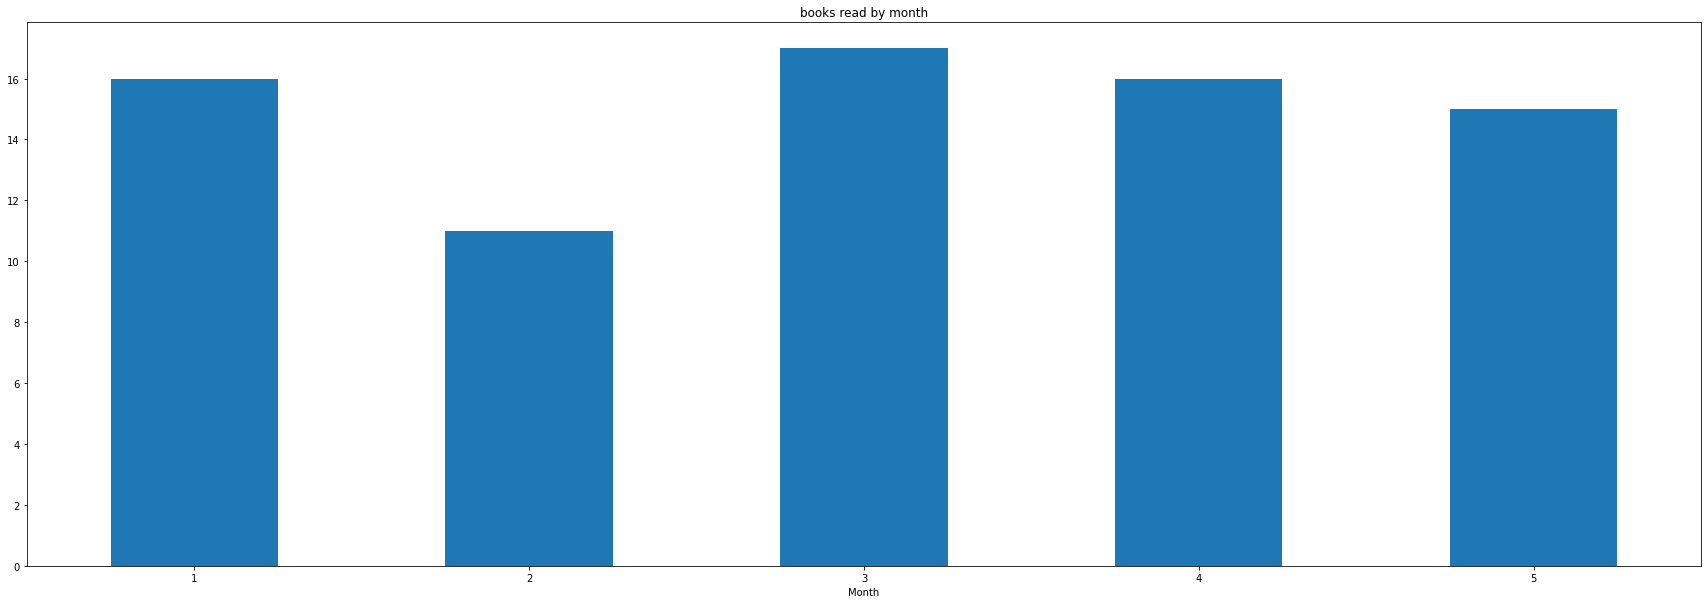

In [131]:
plt.figure(figsize = (30, 10))
plt.title('books read by month')
book_count_by_month.plot.bar(x = 'Month', y = '', rot = 0)